In [5]:
from xml.etree import ElementTree as ET
import pandas as pd
import folium
import json


def generate_coordinates_dictionary(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    tei_header = root.find('{http://www.tei-c.org/ns/1.0}teiHeader')
    if tei_header is not None:
        places = tei_header.findall('.//{http://www.tei-c.org/ns/1.0}place')
        coordinates_dict = {}

        for place in places:
            place_name_element = place.find(
                '{http://www.tei-c.org/ns/1.0}placeName')
            if place_name_element is not None:
                place_name = place_name_element.text
                
                place_type = place.get('type')

                geo_element = place.find(
                    '{http://www.tei-c.org/ns/1.0}location/{http://www.tei-c.org/ns/1.0}geo')
                if geo_element is not None:
                    coordinates = geo_element.text
                    if coordinates:
                        try:
                            lat, lon = coordinates.split(",")
                            # Convert to float and create a tuple
                            coordinates_dict[(place_name, place_type)] = (
                                float(lat), float(lon))
                            
                        except ValueError:
                            print(
                                f"Invalid coordinates format for {place_name}: {coordinates}")
                            

        m = folium.Map(location=[48.21095900638111,16.377296146797722], zoom_start=5)
        for key, value in coordinates_dict.items():
            if key[1] == 'city':
                folium.Circle(
                    radius=5000,
                    location=value,
                    popup=key[0],
                    color="#3186cc",
                    fill=True,
                    fill_color="#3186cc",
                    tooltip=key[0],
                ).add_to(m)
            else:
               folium.Marker(location=value, popup=key[0]).add_to(m)
        
        #modo per tracciare la strada 
        trail_coordinates = [
        (48.212420, 16.361596),
        (48.212349, 16.361934),
        (48.211702, 16.363181),
        ]

        folium.PolyLine(trail_coordinates, tooltip="Schreyvogel Strasse").add_to(m)
        #modo per tracciare l'area dello stato
        try:
            with open('denmark-detailed-boundary_896.geojson', 'r', encoding='utf-8') as file:
                data = json.load(file)
                folium.GeoJson(data, name="denmark", tooltip="Denmark").add_to(m)
        except Exception as e:
            print(f"Error loading GeoJSON: {e}")

        return m
        
# m.save("metascript_map.html")


generate_coordinates_dictionary("C:/Users/crosi/Documents/GitHub/metascript/Dream_Story.xml")

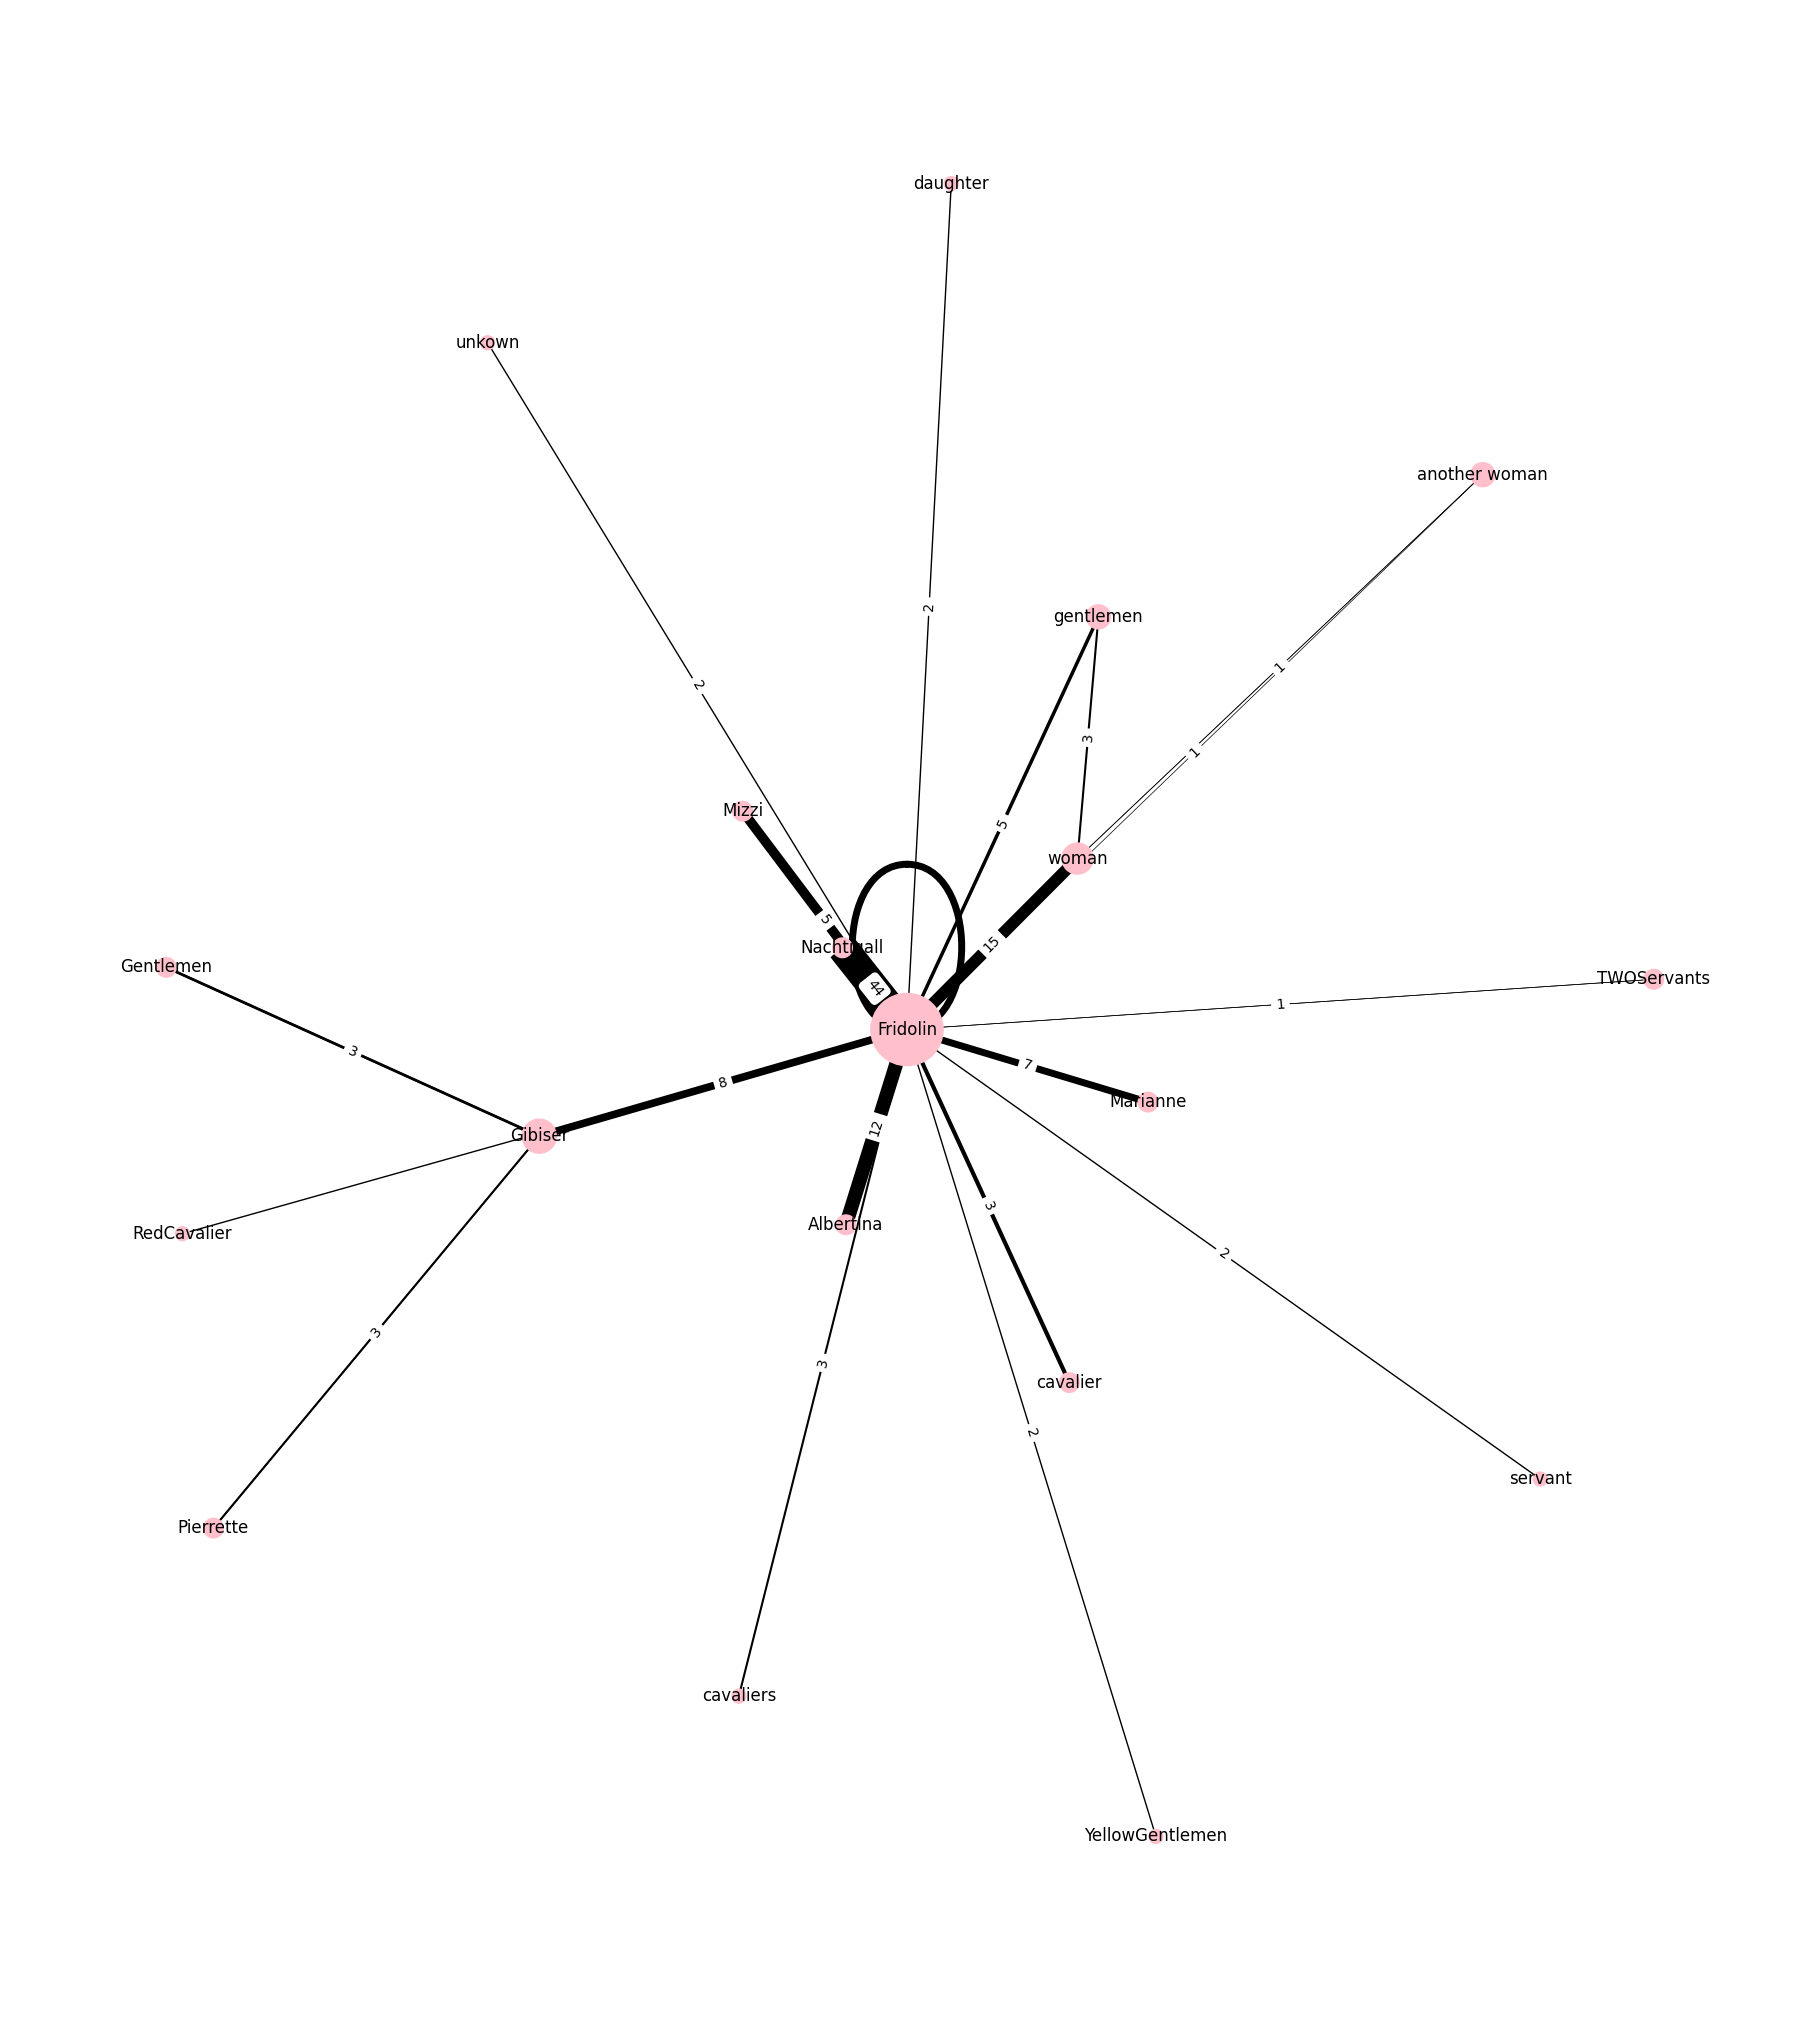

In [112]:
from xml.etree import ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt

def generate_coordinates_dictionary(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    content_list = []
    for said_tag in root.findall('.//{http://www.tei-c.org/ns/1.0}said'):
        who_tag = said_tag.get('who')
        listener_tag = said_tag.get('listener')
        if who_tag is not None:
            content_list.append((who_tag,listener_tag))

    new_dict={}
    for i in content_list:
        if i not in new_dict:
            new_dict[i] = 1
        else:
            new_dict[i] +=1
    

    G = nx.MultiGraph()

    # Add edges from the dictionary keys with weights as edge attributes
    for edge, weight in new_dict.items():
        if all(node is not None for node in edge):
            G.add_edge(edge[0], edge[1], weight=weight)


    # Create a layout for the nodes using spring_layout for better separation
    pos = nx.spring_layout(G, seed=100) 

    # Get edge weights for labeling and edge thickness
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    edge_width = [d['weight'] * 0.5 for _, _, d in G.edges(data=True)]  

    # Get node weights for adjusting node size
    node_weights = [G.degree[node] for node in G.nodes()]
    node_size = [weight * 100 for weight in node_weights]  

    
    plt.figure(figsize=(18, 20))  

    # Draw the graph with improved settings
    nx.draw(G, pos, with_labels=True, node_color='pink', node_size=node_size, font_size=12,
            width=edge_width, edge_cmap=plt.cm.Blues, edge_vmin=min(edge_width), edge_vmax=max(edge_width))
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    
    # Show the plot
    plt.show()

generate_coordinates_dictionary("C:/Users/crosi/Documents/GitHub/metascript/Dream_Story.xml")